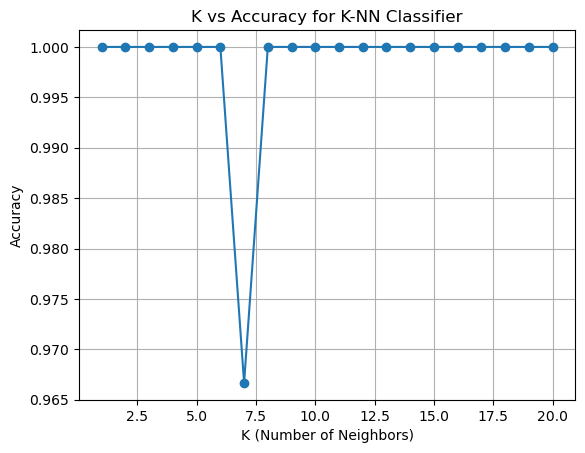

Maximum Accuracy is achieved at K = 1

Accuracy with K = 1: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_knn_model(k_value, X_train, y_train, X_test, y_test):
    knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    return accuracy, confusion_mat

k_values = range(1, 21)  
accuracies = []

for k in k_values:
    accuracy, _ = evaluate_knn_model(k, X_train, y_train, X_test, y_test)
    accuracies.append(accuracy)


plt.plot(k_values, accuracies, marker='o')
plt.title('K vs Accuracy for K-NN Classifier')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

max_accuracy_k = k_values[np.argmax(accuracies)]
print(f"Maximum Accuracy is achieved at K = {max_accuracy_k}")

optimal_accuracy, optimal_confusion_mat = evaluate_knn_model(max_accuracy_k, X_train, y_train, X_test, y_test)
print(f"\nAccuracy with K = {max_accuracy_k}: {optimal_accuracy}")
print("\nConfusion Matrix:")
print(optimal_confusion_mat)